# 이미지 데이터 셋을 이용한 CNN Modeling
## Logo_Data_Set Categorical Classification
* Train_Data : 498
* Test_Data : 177

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# II. Data Preprocessing

In [3]:
train_dir = './datasets/Logo_Data/train'
valid_dir = './datasets/Logo_Data/test'
test_dir  = './datasets/Logo_Data/test'

## ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (75, 75),
                  batch_size = 8,
                  class_mode = 'categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


## Test train_generator

In [5]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (8, 75, 75, 3)
배치 레이블 크기: (8, 27)


In [6]:
labels_batch

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

# III. CNN Keras Modeling

## Model Define

* Feature Extraction & Classification

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

## Model Compile

* 모델 학습방법 설정

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## Model Fit

* 약 5분

In [10]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 62,
                       epochs = 200,
                       validation_data = valid_generator,
                       validation_steps = 22)

Epoch 1/200
62/62 [==============================] - 6s 18ms/step - loss: 3.2730 - accuracy: 0.0510 - val_loss: 3.2051 - val_accuracy: 0.0568
Epoch 2/200
62/62 [==============================] - 1s 11ms/step - loss: 2.8819 - accuracy: 0.1816 - val_loss: 2.7735 - val_accuracy: 0.2045
Epoch 3/200
62/62 [==============================] - 1s 11ms/step - loss: 2.2453 - accuracy: 0.3571 - val_loss: 2.3743 - val_accuracy: 0.3295
Epoch 4/200
62/62 [==============================] - 1s 11ms/step - loss: 1.4984 - accuracy: 0.5510 - val_loss: 2.0993 - val_accuracy: 0.4830
Epoch 5/200
62/62 [==============================] - 1s 11ms/step - loss: 0.9720 - accuracy: 0.7163 - val_loss: 2.3025 - val_accuracy: 0.4886
Epoch 6/200
62/62 [==============================] - 1s 10ms/step - loss: 0.4983 - accuracy: 0.8551 - val_loss: 2.6401 - val_accuracy: 0.5341
Epoch 7/200
62/62 [==============================] - 1s 10ms/step - loss: 0.2355 - accuracy: 0.9367 - val_loss: 3.4592 - val_accuracy: 0.5170
Epoch 

62/62 [==============================] - 1s 10ms/step - loss: 7.2873e-06 - accuracy: 1.0000 - val_loss: 5.2580 - val_accuracy: 0.5284
Epoch 58/200
62/62 [==============================] - 1s 11ms/step - loss: 7.0295e-06 - accuracy: 1.0000 - val_loss: 5.2913 - val_accuracy: 0.5284
Epoch 59/200
62/62 [==============================] - 1s 10ms/step - loss: 6.6573e-06 - accuracy: 1.0000 - val_loss: 5.2745 - val_accuracy: 0.5284
Epoch 60/200
62/62 [==============================] - 1s 11ms/step - loss: 6.2617e-06 - accuracy: 1.0000 - val_loss: 5.3009 - val_accuracy: 0.5284
Epoch 61/200
62/62 [==============================] - 1s 11ms/step - loss: 5.9430e-06 - accuracy: 1.0000 - val_loss: 5.3147 - val_accuracy: 0.5284
Epoch 62/200
62/62 [==============================] - 1s 10ms/step - loss: 5.7168e-06 - accuracy: 1.0000 - val_loss: 5.3270 - val_accuracy: 0.5284
Epoch 63/200
62/62 [==============================] - 1s 11ms/step - loss: 5.3541e-06 - accuracy: 1.0000 - val_loss: 5.3434 - val_a

Epoch 113/200
62/62 [==============================] - 1s 11ms/step - loss: 6.6003e-07 - accuracy: 1.0000 - val_loss: 5.8451 - val_accuracy: 0.5455
Epoch 114/200
62/62 [==============================] - 1s 11ms/step - loss: 6.1940e-07 - accuracy: 1.0000 - val_loss: 5.8603 - val_accuracy: 0.5455
Epoch 115/200
62/62 [==============================] - 1s 11ms/step - loss: 6.1818e-07 - accuracy: 1.0000 - val_loss: 5.8498 - val_accuracy: 0.5511
Epoch 116/200
62/62 [==============================] - 1s 11ms/step - loss: 5.7512e-07 - accuracy: 1.0000 - val_loss: 5.8059 - val_accuracy: 0.5511
Epoch 117/200
62/62 [==============================] - 1s 11ms/step - loss: 5.5615e-07 - accuracy: 1.0000 - val_loss: 5.7166 - val_accuracy: 0.5511
Epoch 118/200
62/62 [==============================] - 1s 11ms/step - loss: 5.5323e-07 - accuracy: 1.0000 - val_loss: 5.8592 - val_accuracy: 0.5511
Epoch 119/200
62/62 [==============================] - 1s 10ms/step - loss: 5.1406e-07 - accuracy: 1.0000 - val_

62/62 [==============================] - 1s 11ms/step - loss: 9.3664e-08 - accuracy: 1.0000 - val_loss: 6.3513 - val_accuracy: 0.5625
Epoch 169/200
62/62 [==============================] - 1s 10ms/step - loss: 9.4638e-08 - accuracy: 1.0000 - val_loss: 6.3984 - val_accuracy: 0.5568
Epoch 170/200
62/62 [==============================] - 1s 10ms/step - loss: 8.9772e-08 - accuracy: 1.0000 - val_loss: 6.3409 - val_accuracy: 0.5625
Epoch 171/200
62/62 [==============================] - 1s 11ms/step - loss: 8.6852e-08 - accuracy: 1.0000 - val_loss: 6.3698 - val_accuracy: 0.5568
Epoch 172/200
62/62 [==============================] - 1s 11ms/step - loss: 8.1014e-08 - accuracy: 1.0000 - val_loss: 6.4273 - val_accuracy: 0.5568
Epoch 173/200
62/62 [==============================] - 1s 11ms/step - loss: 8.1257e-08 - accuracy: 1.0000 - val_loss: 6.4340 - val_accuracy: 0.5511
Epoch 174/200
62/62 [==============================] - 1s 10ms/step - loss: 8.0527e-08 - accuracy: 1.0000 - val_loss: 6.4424 -

## 학습 결과 시각화

* Loss Visualization

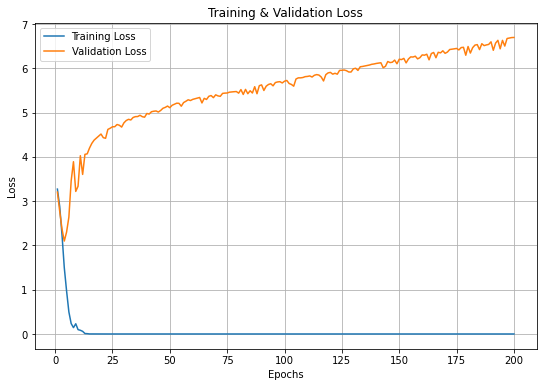

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

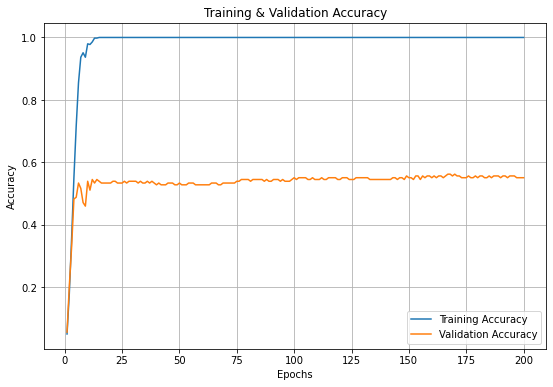

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

## Model Evaluate

* test_generator

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (75, 75),
                 batch_size = 8,
                 class_mode = 'categorical')

Found 177 images belonging to 27 classes.


* Loss & Accuracy

In [14]:
loss, accuracy = model.evaluate(test_generator)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

23/23 [==============================] - 0s 9ms/step - loss: 6.6660 - accuracy: 0.5537
Loss = 6.66601
Accuracy = 0.55367
